# Вступ до ML

## Звичайне(лінейне) математичне уявлення передбачення

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test_x = [1,2,3,4,5,7,9]
test_y = [1.5, 2.0, 2.5, 3.0, 3.5, 4.5, 5.5]
test_df = pd.DataFrame({'x': test_x,
                        'y': test_y})
test_df

,x,y
0,1,1.5
1,2,2.0
2,3,2.5
3,4,3.0
4,5,3.5
5,7,4.5
6,9,5.5


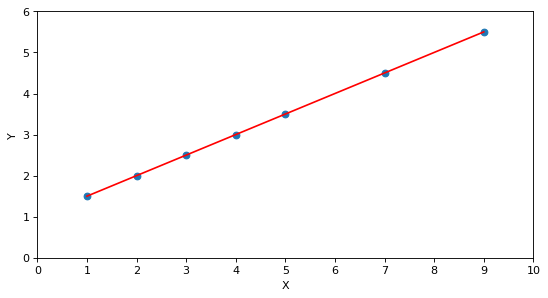

In [4]:
plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(test_df.x, test_df.y)
plt.plot(test_df.x, test_df.y, color = 'r')

plt.ylim(0, 6)
plt.xticks(range(0,11,1))
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

$$y = k*x + b$$

In [5]:
def find_simple_k(df):
  length_x = df.x[1] - df.x[0]
  length_y = df.y[1] - df.y[0]
  k = length_y / length_x
  return k

b = 1  # const
k = find_simple_k(test_df)
print(f'k is {k}\nb is {b}')
print(f'Final function is\ny = {k}*x + {b}')

k is 0.5
b is 1
Final function is
y = 0.5*x + 1


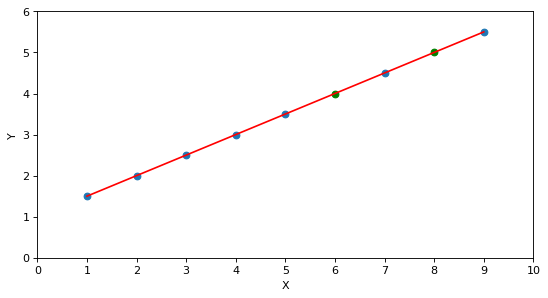

In [6]:
def find_y(x, k, b):
  return k*x + b

x_new = [6, 8]
y_new = [find_y(i, k, b) for i in x_new]
test_df_new = pd.DataFrame({'x': x_new, 'y': y_new})

plt.figure(figsize=(8, 4), dpi=80)

plt.scatter(test_df.x, test_df.y)
plt.plot(test_df.x, test_df.y, color = 'r')
plt.scatter(test_df_new.x, test_df_new.y, color = 'g')

plt.ylim(0, 6)
plt.xticks(range(0,11,1))
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

## “A regression of children’s height towards the average” $$Sir Francis Galton$$

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://medium.com/codex/how-to-perform-simple-linear-regression-using-r-and-python-including-diagnostic-checking-and-ba6ad520d381
# https://github.com/kautzarichramsyah/medium-simple-linear-regression/blob/main/children_parent_height.csv

path = '/content/children_parent_height.csv'
df = pd.read_csv(path)
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   father_height    299 non-null    int64
 1   children_height  299 non-null    int64
 2   mother_height    299 non-null    int64
dtypes: int64(3)
memory usage: 7.1 KB


None

,father_height,children_height,mother_height
0,149,153,149
1,151,154,161
2,151,155,157
3,151,157,157
4,152,159,133


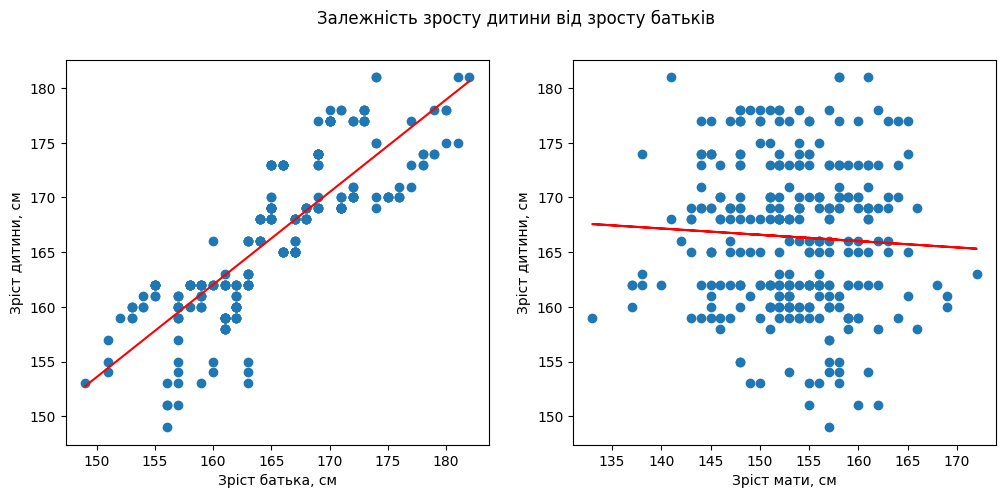

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

a_0, b_0 = np.polyfit(df['father_height'], df['children_height'], 1)
ax[0].scatter(df['father_height'], df['children_height'])
ax[0].plot(df['father_height'], a_0 * df['father_height'] + b_0, color='red', label='Лінійна регресія')
ax[0].set_xlabel('Зріст батька, см')
ax[0].set_ylabel('Зріст дитини, см')

a_1, b_1 = np.polyfit(df['mother_height'], df['children_height'], 1)
ax[1].scatter(df['mother_height'], df['children_height'])
ax[1].plot(df['mother_height'], a_1 * df['mother_height'] + b_1, color='red', label='Лінійна регресія')
ax[1].set_xlabel('Зріст мати, см')
ax[1].set_ylabel('Зріст дитини, см')

fig.suptitle('Залежність зросту дитини від зросту батьків')
plt.show()

# Лінійна регресія

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import data
df = pd.read_csv('/content/Housing.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='area', ylabel='price'>

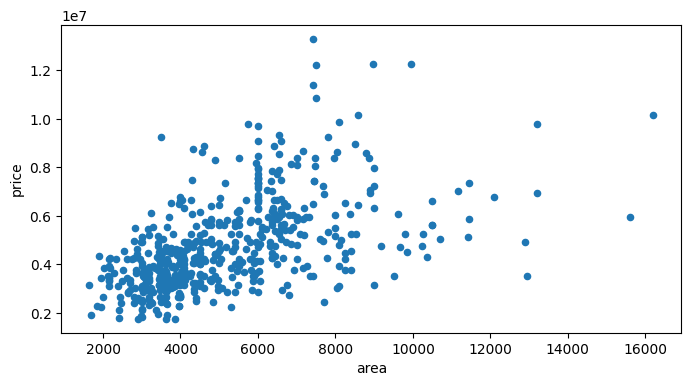

In [11]:
# EDA
df.plot(x = 'area',
        y = 'price',
        kind = 'scatter',
        figsize = (8,4))

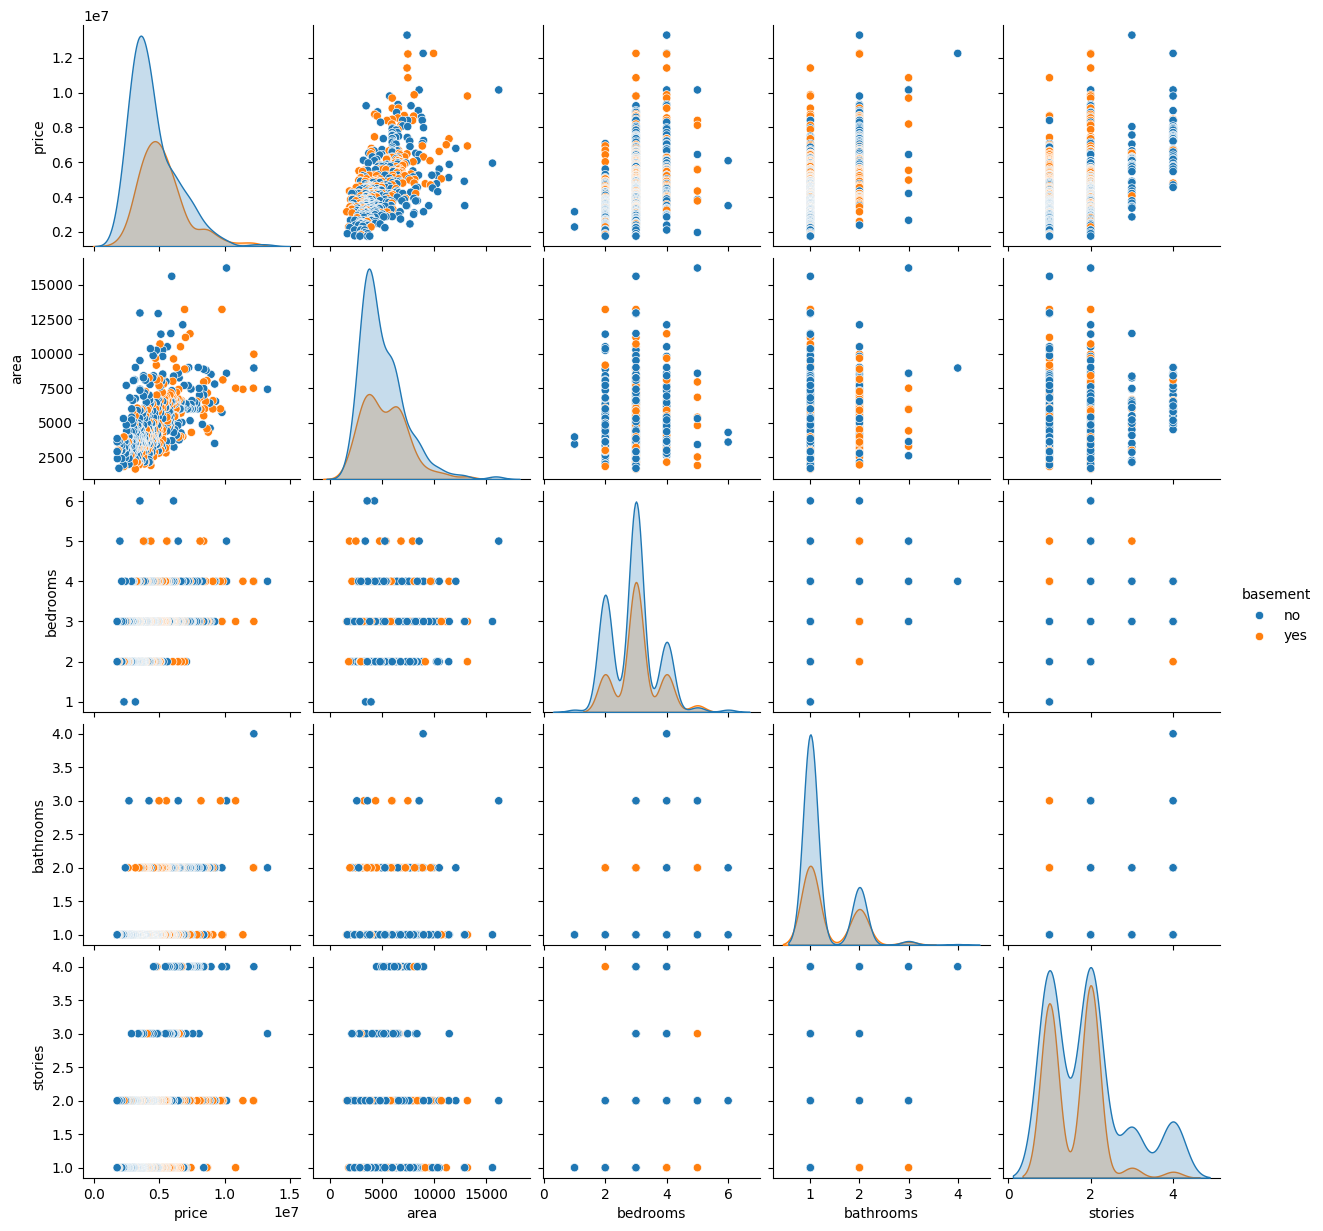

In [12]:
#sns.set_style('darkgrid')
features_to_analyse = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
sns.pairplot(df,
             vars = features_to_analyse,
             hue = 'basement')
plt.show()

<Axes: >

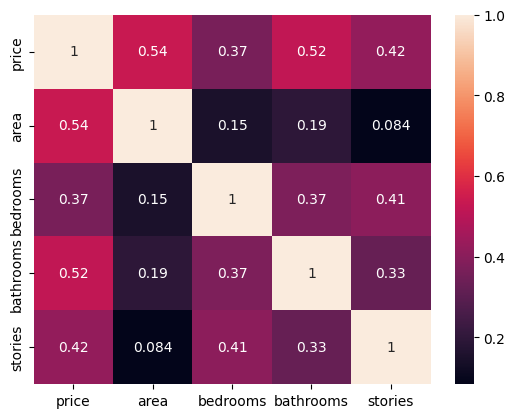

In [13]:
df_corr = df[features_to_analyse].corr()
sns.heatmap(df_corr, annot = True)

## Лінійна регресія з однією змінною
$$h(x) = w_0 + w_1 * x$$

In [14]:
def h(w_0, w_1, x):
  return w_0 + w_1 * x

### Compute loss

 $Mserror$ - функція середньоквадратичної помилки $MSE(loss func) = \frac{1}{2n}\sum_{i=0}^n{(\text{y}_i-\text{y_pred}_i})^2 = \frac{1}{2n}\sum_{i=0}^n{(\text{y}_i-(w_1\cdot X_i + w_0)})^2 = \frac{1}{2n}\sum_{i=0}^n{(\text{y}_i-w_1\cdot X_i - w_0})^2$


In [15]:
list(zip(df['area'], df['price']))

[(7420, 13300000),
 (8960, 12250000),
 (9960, 12250000),
 (7500, 12215000),
 (7420, 11410000),
 (7500, 10850000),
 (8580, 10150000),
 (16200, 10150000),
 (8100, 9870000),
 (5750, 9800000),
 (13200, 9800000),
 (6000, 9681000),
 (6550, 9310000),
 (3500, 9240000),
 (7800, 9240000),
 (6000, 9100000),
 (6600, 9100000),
 (8500, 8960000),
 (4600, 8890000),
 (6420, 8855000),
 (4320, 8750000),
 (7155, 8680000),
 (8050, 8645000),
 (4560, 8645000),
 (8800, 8575000),
 (6540, 8540000),
 (6000, 8463000),
 (8875, 8400000),
 (7950, 8400000),
 (5500, 8400000),
 (7475, 8400000),
 (7000, 8400000),
 (4880, 8295000),
 (5960, 8190000),
 (6840, 8120000),
 (7000, 8080940),
 (7482, 8043000),
 (9000, 7980000),
 (6000, 7962500),
 (6000, 7910000),
 (6550, 7875000),
 (6360, 7840000),
 (6480, 7700000),
 (6000, 7700000),
 (6000, 7560000),
 (6000, 7560000),
 (6000, 7525000),
 (6600, 7490000),
 (4300, 7455000),
 (7440, 7420000),
 (7440, 7420000),
 (6325, 7420000),
 (6000, 7350000),
 (5150, 7350000),
 (6000, 7350000),


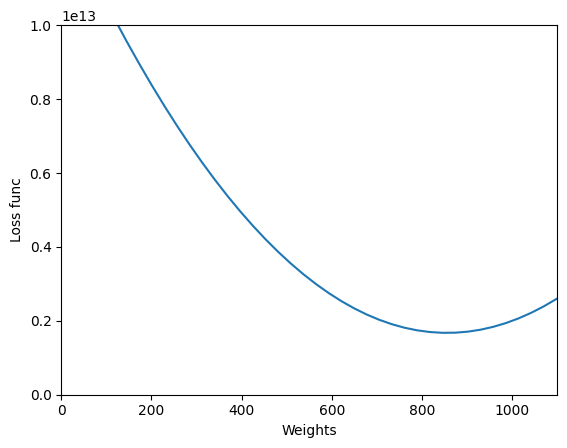

In [17]:
def loss_func(w_0, w_1, df):
  '''
  MSE
  '''
  n = df['area'].shape[0]
  cost = 0
  for x, y in zip(df['area'], df['price']):
    cost += (h(w_0, w_1, x) - y)**2
  return cost/(2*n)


w_0 = 0
w_1 = np.linspace(-6000, 8000, 500)
plt.plot(w_1, [loss_func(w_0, w, df) for w in w_1])
plt.xlabel('Weights')
plt.ylabel('Loss func')

plt.ylim(0,1e13)
plt.xlim(0,1100)
plt.show()

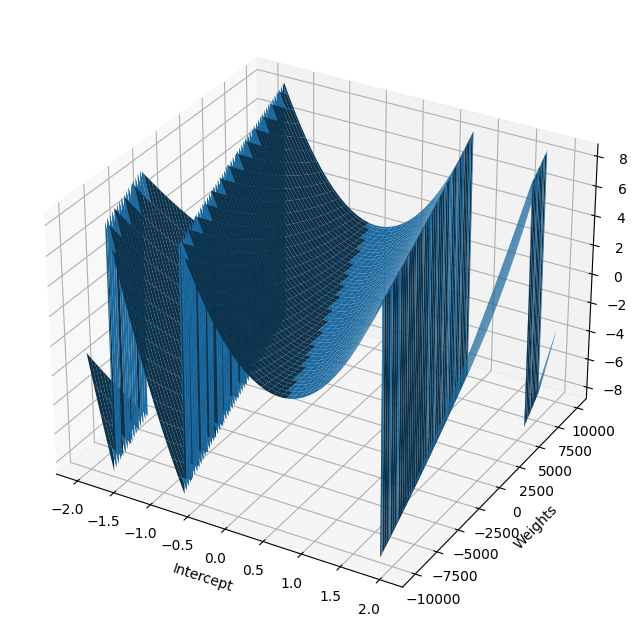

In [19]:
#grid_w_0 = np.arange(-10000, 10000, 200)
grid_w_0 = np.arange(-200000000, 200000000, 200000)
grid_w_1 = np.arange(-10000, 10000, 200)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)
z = loss_func(w_0, w_1, df)

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(w_0, w_1, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Weights')
ax.set_zlabel('Loss func')
plt.show()

### Алгоритм функції пошуку (Градієнтний спуск (Gradient Descending))
_Градієнт_ функції $f$ це $n$-мірный вектор з часткових похідних.

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$


Приклад:
Для функції $F(x, y, z)$ її градієнт дорвінює

$$\nabla f(x, y, z) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}) $$

При цьому, градієнт задає напрямок якнайшвидшого зростання функції. Отже, антиградієнт показуватиме напрям її якнайшвидшого спадання.

gr_mserror - градієнт функції MSE. Розпишемо його окремо для коефіцієнта зсуву та коефіцієнта нахилу

Зсув:
$\frac{∂ MSE}{∂ w_0} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -1$

Нахил:
$\frac{∂ MSE}{∂ w_1} = \frac{1 \cdot 2}{n}\sum({y_i -\text{y_pred}_i})\cdot -X$

In [20]:
def grad_step(weights, grads, learning_rate = 0.001):
  w_0, w_1 = weights
  grad_0, grad_1 = grads

  w_0 -= learning_rate * grad_0
  w_1 -= learning_rate * grad_1

  return w_0, w_1

def grad_w_0(w_0, w_1, df):

  n = df.area.shape[0]
  cost = 0
  for x, y in zip(df['area'], df['price']):
    cost += (h(w_0, w_1, x) - y)

  return cost/(n)

def grad_w_1(w_0, w_1, df):

  n = df.area.shape[0]
  cost = 0
  for x, y in zip(df['area'], df['price']):
    cost += (h(w_0, w_1, x) - y) * x

  return cost/(n)


def grad_descent(weights, df, num_iter, learning_rate = 0.01, epsilon = 1e-10):

  w_0, w_1 = weights
  loss = loss_func(w_0, w_1, df)
  loss_history = [loss]

  for i in range(num_iter):

    d_w_0 = grad_w_0(w_0, w_1, df)
    d_w_1 = grad_w_1(w_0, w_1, df)
    grads = (d_w_0, d_w_1)
    w_0, w_1 = grad_step(weights, grads, learning_rate = learning_rate)
    weights = (w_0, w_1)
    loss = loss_func(w_0, w_1, df)

    if abs(loss - loss_history[-1]) < epsilon:
      loss_history.append(loss)
      break

    loss_history.append(loss)

  return weights, loss_history

In [21]:
weights, loss_history = grad_descent((0.,0.), df, 1000)

OverflowError: (34, 'Numerical result out of range')

### Normalization


In [22]:
def normalization(data):

  mean = np.mean(data)
  value_range = np.max(data) - np.min(data)
  result = []
  for x in data:
    norm_x = (x-mean) / value_range
    result.append(norm_x)

  return result

In [23]:
norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm.head()

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977


### model training

<Axes: xlabel='area', ylabel='price'>

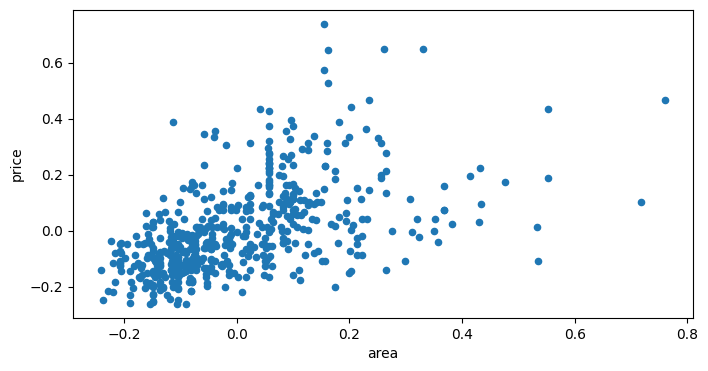

In [24]:
norm.plot(x = 'area',
        y = 'price',
        kind = 'scatter',
        figsize = (8,4))

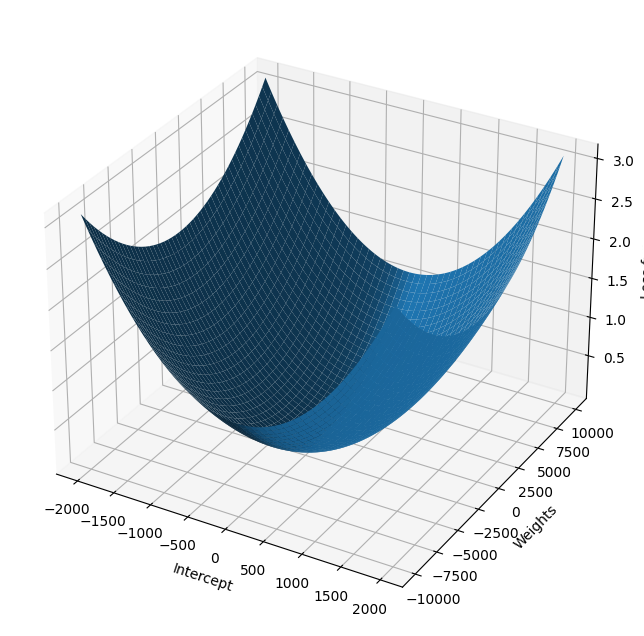

In [25]:
grid_w_0 = np.arange(-2000, 2000, 10)
grid_w_1 = np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)
z = loss_func(w_0, w_1, norm)

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(w_0, w_1, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Weights')
ax.set_zlabel('Loss func')
plt.show()

In [26]:
weights, loss_history = grad_descent((0.,0.), norm, 1000)

In [27]:
loss_history

[0.013088679029173688,
 0.013087009264782871,
 0.013085340241854681,
 0.013083671960059924,
 0.013082004419069452,
 0.013080337618554386,
 0.0130786715581859,
 0.013077006237635263,
 0.013075341656574044,
 0.013073677814673808,
 0.013072014711606357,
 0.01307035234704362,
 0.013068690720657623,
 0.013067029832120635,
 0.013065369681104954,
 0.013063710267283136,
 0.013062051590327766,
 0.01306039364991171,
 0.013058736445707828,
 0.013057079977389275,
 0.013055424244629217,
 0.013053769247101051,
 0.013052114984478341,
 0.013050461456434695,
 0.013048808662643931,
 0.013047156602780021,
 0.013045505276517044,
 0.013043854683529237,
 0.013042204823491034,
 0.01304055569607688,
 0.013038907300961569,
 0.013037259637819829,
 0.01303561270632666,
 0.01303396650615716,
 0.013032321036986589,
 0.013030676298490355,
 0.01302903229034399,
 0.013027389012223169,
 0.013025746463803738,
 0.01302410464476169,
 0.013022463554773114,
 0.013020823193514301,
 0.013019183560661575,
 0.01301754465589159

In [28]:
weights

(3.201516523854852e-17, 0.11589612692271574)

### Візуалізація результату тренування

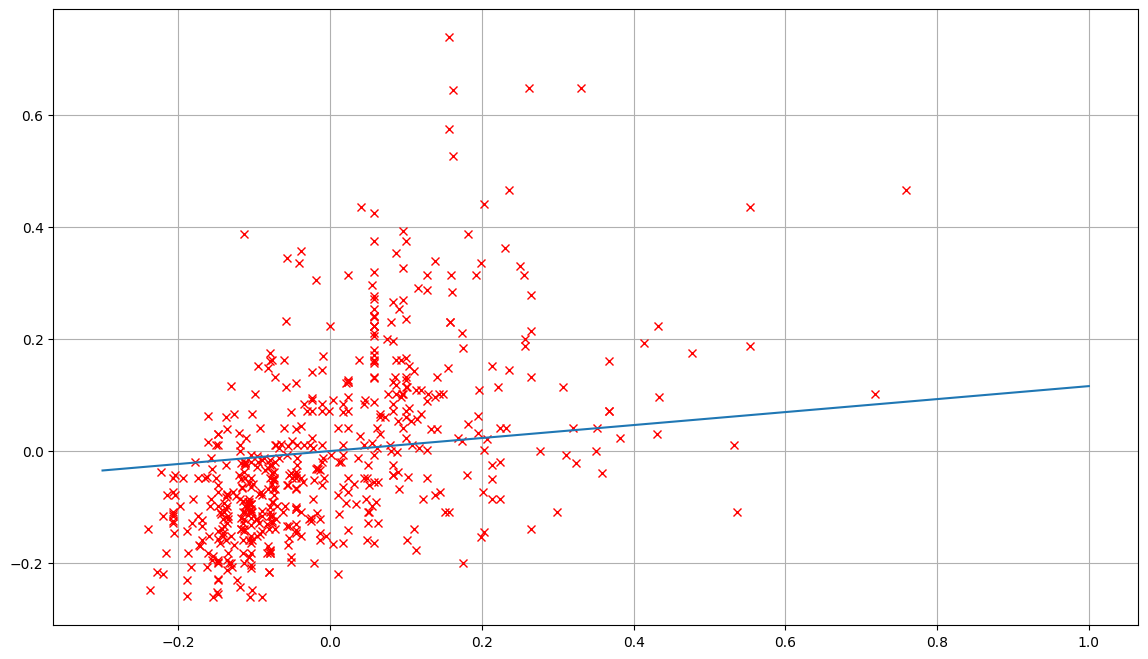

In [29]:
plt.figure(figsize = (14,8))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(weights[0], weights[1], x))
plt.grid()

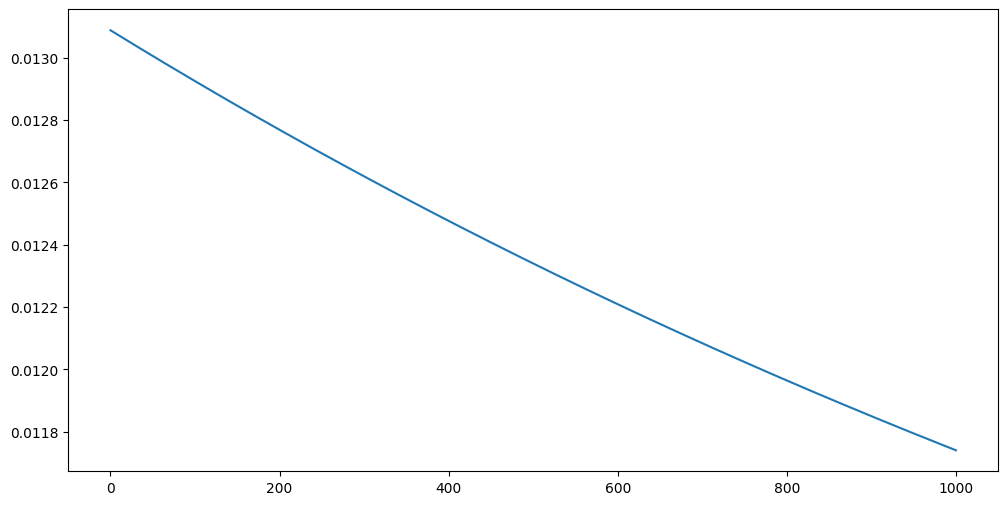

In [30]:
# Крива навчання
plt.figure(figsize = (12,6))
plt.plot(loss_history)

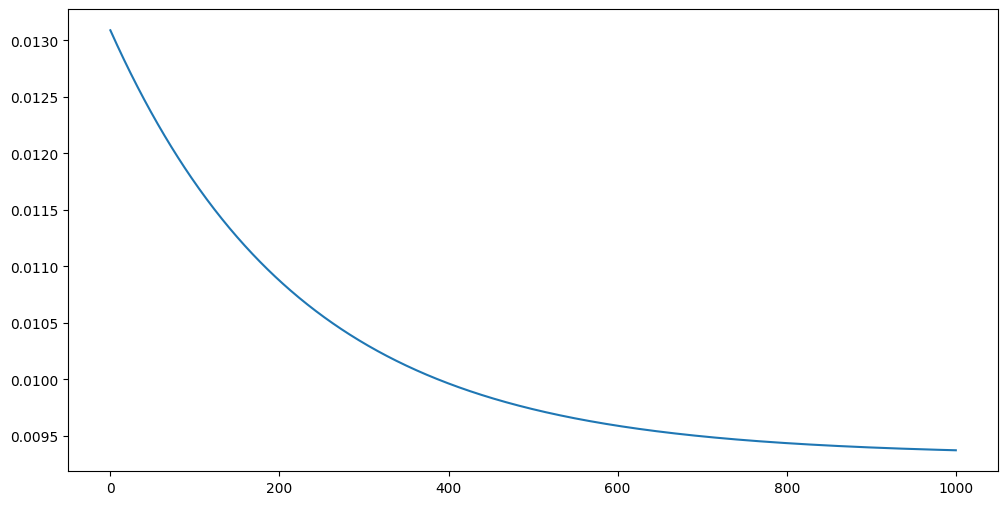

In [31]:
# Зміна learning_rate
weights, loss_history = grad_descent((0.,0.), norm, 1000, learning_rate = 0.1)
plt.figure(figsize = (12,6))
plt.plot(loss_history)

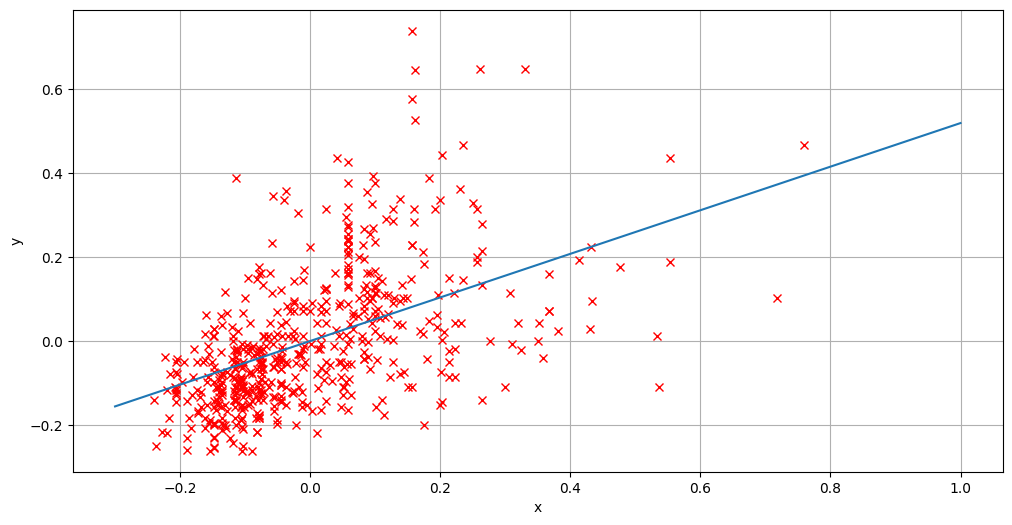

In [32]:
plt.figure(figsize = (12,6))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(weights[0], weights[1], x))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### Донавчання

In [39]:
weights, loss_history_ext = grad_descent((weights[0], weights[1]), norm, 1000, learning_rate = 0.1)

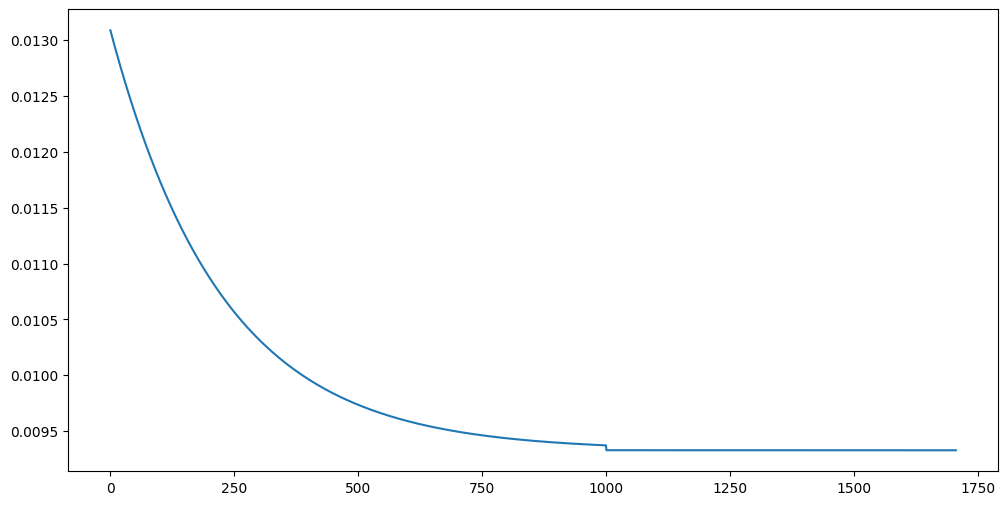

In [40]:
history = loss_history + loss_history_ext
plt.figure(figsize = (12,6))
plt.plot(history)

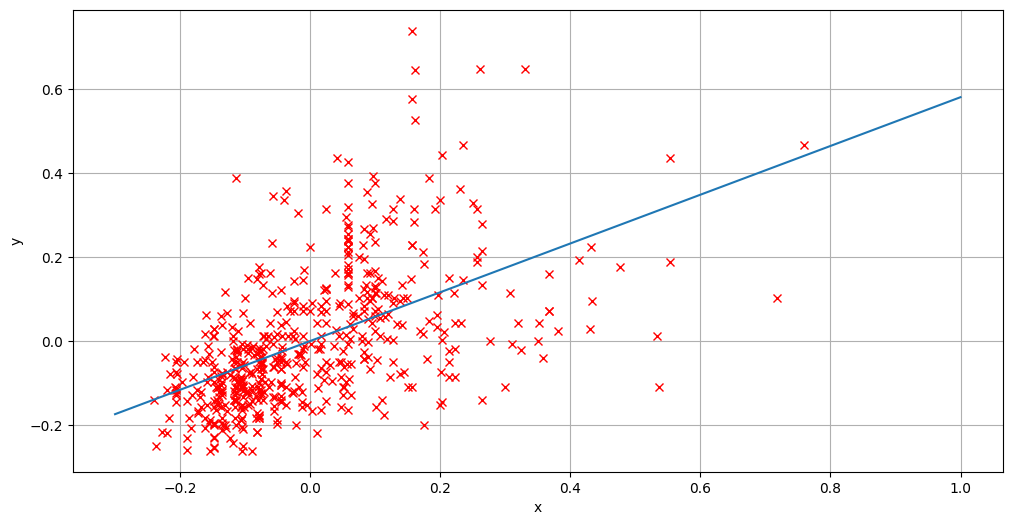

In [41]:
plt.figure(figsize = (12,6))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(weights[0], weights[1], x))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Лінійна регресія з n змінними
$$h(x) = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$$

Передбачення лінійної моделі в матричній формі запису - це перемноження терезів на ознаки плюс вільна вага.

$$y_{pred} = X\cdot w + w_0$$

При этом очень важно, чтобы соблюдались размерности матрицы $X$ и вектора $w$.
У нас размерности равны. Тоді запишемо це через *скалярное произведение*.

$$y_{pred} = \langle X, w\rangle + w_0$$


Припустимо в нас є $X_0$ для вектора вагів який дорівнює 1.
$$y_{pred} = \langle X, w\rangle + I\cdot w_0$$
Тоді ми можемо переписати це у вигляд:
$$y_{pred} = \langle X, w\rangle$$

In [42]:
def linear_regression(X, y, learning_rate=0.01, num_iter=1000, epsilon=1e-10):

    m, n = X.shape
    weights = np.zeros(X.shape[1])
    loss_history = []
    y = y.to_numpy()

    for epoch in range(num_iter):
      y_pred = X.dot(weights).to_numpy()
      loss = np.sum((y_pred - y) ** 2) / (m)
      loss_history.append(loss)

      gradient = 2/m * X.T.dot(y_pred - y)
      weights -= learning_rate * gradient

      if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_iter}, mse: {loss}')
      if loss < epsilon:
        print(f'Converged. Epoch {epoch + 1}, Final MSE: {loss}')
        break


    return weights, loss_history

def normalize_features(X):

    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)

    X_normalized = (X - mean_values) / std_values

    return X_normalized


X_multi = df[['area', 'bathrooms']]
y_multi = df['price']

X_norm = normalize_features(X_multi)
y_norm = normalize_features(y_multi)

weights_multi, loss_history_multi = linear_regression(X_norm, y_norm, learning_rate=0.1, epsilon=1e-10, num_iter=1000)

Epoch 100/1000, mse: 0.5349144699043789
Epoch 200/1000, mse: 0.5349144699043789
Epoch 300/1000, mse: 0.5349144699043789
Epoch 400/1000, mse: 0.5349144699043789
Epoch 500/1000, mse: 0.5349144699043789
Epoch 600/1000, mse: 0.5349144699043789
Epoch 700/1000, mse: 0.5349144699043789
Epoch 800/1000, mse: 0.5349144699043789
Epoch 900/1000, mse: 0.5349144699043789
Epoch 1000/1000, mse: 0.5349144699043789


In [43]:
weights_multi

area         0.452693
bathrooms    0.429805
dtype: float64

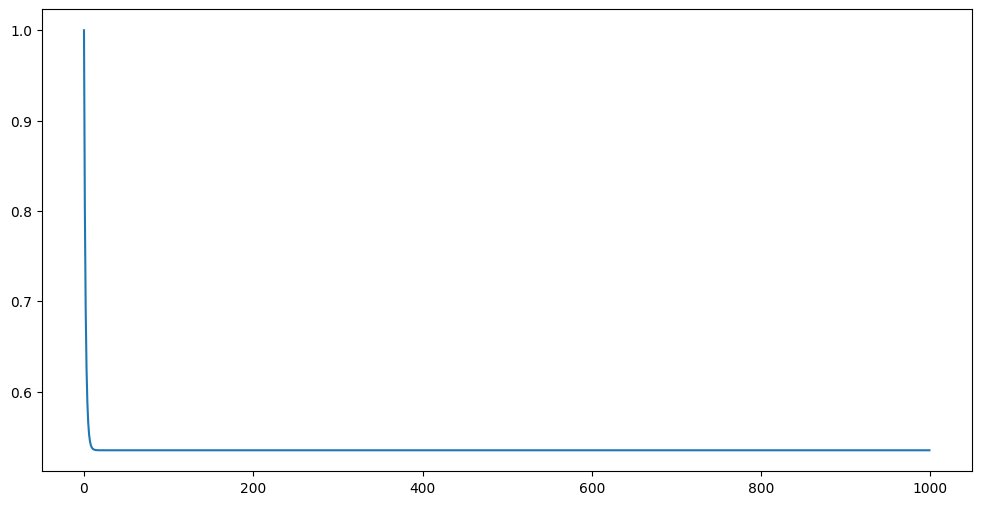

In [44]:
plt.figure(figsize = (12,6))
plt.plot(loss_history_multi)

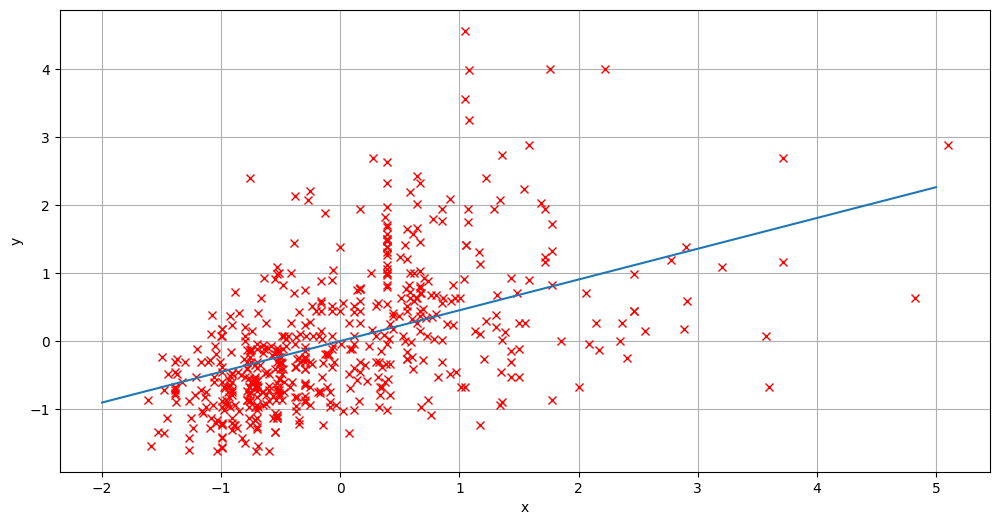

In [45]:
plt.figure(figsize = (12,6))
plt.plot(X_norm.area, y_norm, 'rx')
x = np.linspace(-2, 5, 500)
plt.plot(x, weights_multi[0]*x)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Scikit-learn realization

In [46]:
# https://scikit-learn.org/stable/
# pip install scikit-learn==1.2.2
import sklearn
sklearn.__version__

'1.2.2'

In [47]:
norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)
norm.head()

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977


In [48]:
from sklearn import linear_model

In [49]:
X = np.array([norm.area]).T
y = np.array([norm.price]).T
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [50]:
model.predict([[5600], [1]])

array([[3.25902289e+03],
       [5.81968373e-01]])

In [51]:
print(f'Коефіціенти моделі: {model.coef_}')
print(f'Коефіціенти моделі: {model.intercept_}')
print(f'-----Ітогове рівняння-----')
print(f'y = {model.intercept_[0]} + {model.coef_[0][0]} * x')

Коефіціенти моделі: [[0.58196837]]
Коефіціенти моделі: [6.35310283e-17]
-----Ітогове рівняння-----
y = 6.353102831524844e-17 + 0.5819683733046755 * x


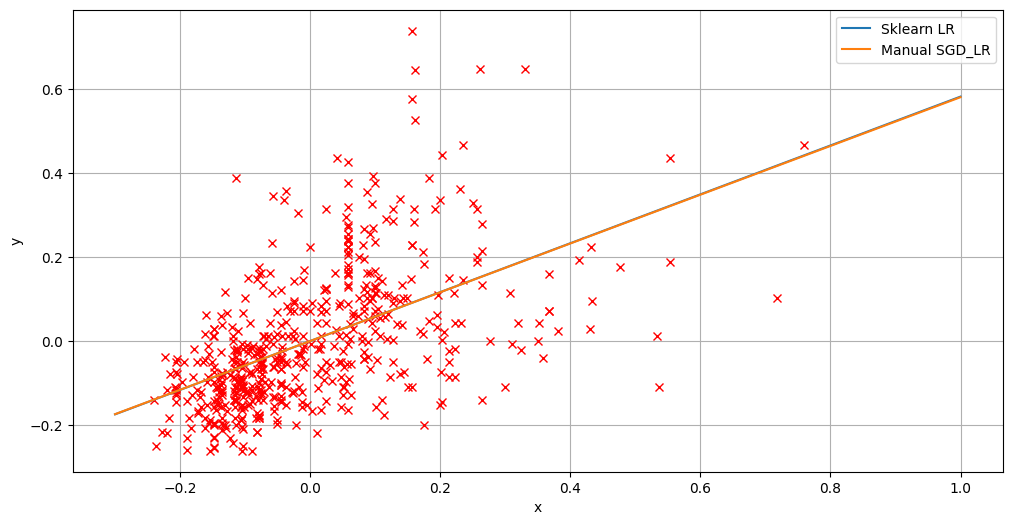

In [52]:
plt.figure(figsize = (12,6))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_[0], x), label = ('Sklearn LR'))
plt.plot(x, h(weights[0], weights[1], x), label = ('Manual SGD_LR'))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

In [53]:
model_SGDLR = linear_model.SGDRegressor(loss = 'squared_error',
                                        penalty ='l2',
                                        max_iter = 1000,
                                        tol = 1e-10,
                                        learning_rate = 'adaptive',
                                        eta0 = 0.1
                                        )
model_SGDLR.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='adaptive', tol=1e-10)

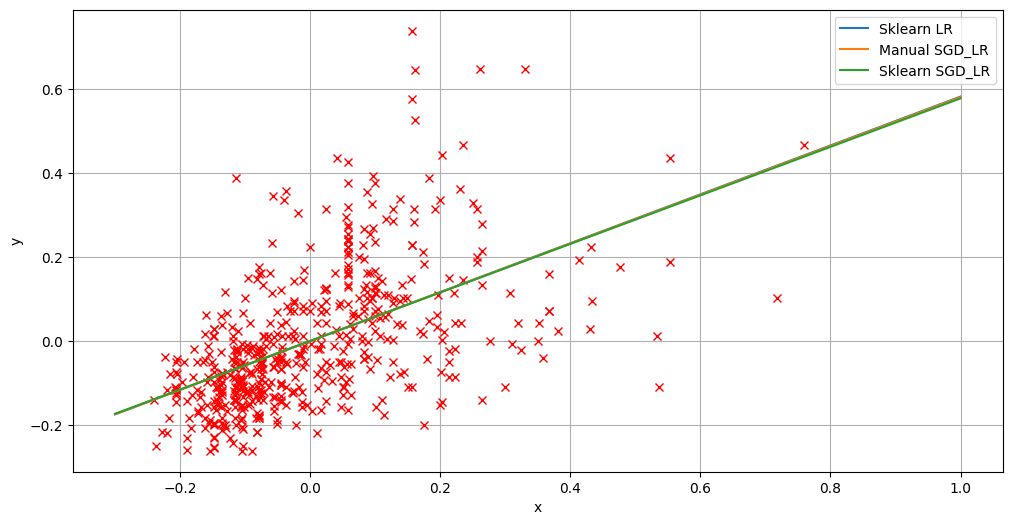

In [54]:
plt.figure(figsize = (12,6))
plt.plot(norm.area, norm.price, 'rx')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(model.intercept_, model.coef_[0], x), label = ('Sklearn LR'))
plt.plot(x, h(weights[0], weights[1], x), label = ('Manual SGD_LR'))
plt.plot(x, h(model_SGDLR.intercept_, model_SGDLR.coef_[0], x), label = ('Sklearn SGD_LR'))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()